# Feature selection in Regression using Correlation

#### Loading the dependencies 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
data = pd.read_csv('./CarPricesData.csv')
data.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


In [3]:
data.isnull().mean()*100

Price        0.000000
Age          0.139276
KM           0.000000
FuelType     0.278552
HP           0.000000
MetColor     0.000000
Automatic    0.000000
CC           0.139276
Doors        0.000000
Weight       0.139276
dtype: float64

In [4]:
data.dropna(inplace=True)

In [5]:
data.duplicated().sum()

1

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
le = LabelEncoder()

In [8]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])

In [9]:
data.sample(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1028,10750,68.0,31000,2,110,1,0,1600.0,4,1035.0
205,11500,44.0,89757,2,110,1,0,1600.0,3,1045.0
1221,8500,73.0,84988,2,110,1,0,1600.0,3,1050.0
1174,7250,80.0,94447,2,110,0,0,1600.0,3,1050.0
450,10500,50.0,73634,2,110,0,0,1587.0,5,1075.0
892,9450,57.0,61000,2,110,1,0,1600.0,3,1050.0
888,11250,61.0,61144,2,110,1,0,1600.0,5,1090.0
1291,7950,78.0,72000,2,110,0,0,1600.0,3,1055.0
683,8950,63.0,101469,2,110,1,0,1600.0,3,1065.0
535,11950,50.0,47219,2,110,1,0,1600.0,5,1080.0


#### Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.

<li> The scikit-learn machine library provides an implementation of the correlation statistic in the f_regression() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

<li> For example, we can define the SelectKBest class to use the f_regression() function and select all features, then transform the train and test sets.

#### Selecting the features and targets

In [10]:
x = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

#### Splitting the data into training and testing sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42, shuffle=True)

#### Defining feature selection with all features included

In [12]:
fs = SelectKBest(score_func=f_regression, k='all')

#### Fitting the fs

In [13]:
fs.fit(x_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000001ECBD5DAA60>)

#### Transorm the train and test data

In [14]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

#### We can then print the scores for each variable (largest is better) and plot the scores for each variable as a bar graph to get an idea of how many features we should select.

### Checking the scores for the features

In [15]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 932.243042
Feature 1: 145.662675
Feature 2: 0.163622
Feature 3: 51.287007
Feature 4: 3.084242
Feature 5: 0.139390
Feature 6: 5.114476
Feature 7: 3.331297
Feature 8: 70.539286


#### Plotting the scores in a bar grapgh

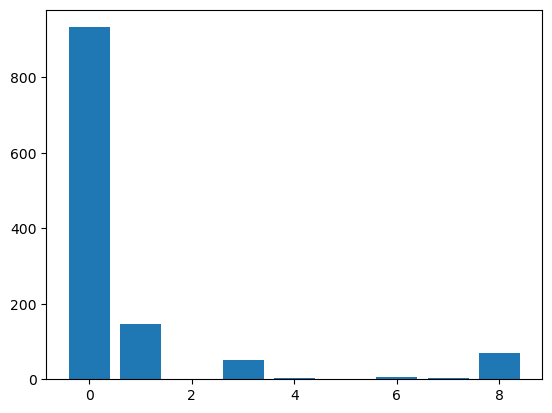

In [16]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

<li> The plot clearly shows 4 features are a lot more important than the other features.
<li> We could set k=4 When configuring the SelectKBest to select these top features.